In [1]:
import os
import shutil

import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Loading Indian Food Data

In [2]:
indianFoodImgs = keras.preprocessing.image_dataset_from_directory('./4_project_data/Indian Food Images',
                                                                  validation_split = 0.2,
                                                                  seed = 5,
                                                                  subset = "training")

Found 4000 files belonging to 80 classes.
Using 3200 files for training.


In [3]:
IndianFoodClasses = indianFoodImgs.class_names # classes name for indian food
print(IndianFoodClasses)

['adhirasam', 'aloo_gobi', 'aloo_matar', 'aloo_methi', 'aloo_shimla_mirch', 'aloo_tikki', 'anarsa', 'ariselu', 'bandar_laddu', 'basundi', 'bhatura', 'bhindi_masala', 'biryani', 'boondi', 'butter_chicken', 'chak_hao_kheer', 'cham_cham', 'chana_masala', 'chapati', 'chhena_kheeri', 'chicken_razala', 'chicken_tikka', 'chicken_tikka_masala', 'chikki', 'daal_baati_churma', 'daal_puri', 'dal_makhani', 'dal_tadka', 'dharwad_pedha', 'doodhpak', 'double_ka_meetha', 'dum_aloo', 'gajar_ka_halwa', 'gavvalu', 'ghevar', 'gulab_jamun', 'imarti', 'jalebi', 'kachori', 'kadai_paneer', 'kadhi_pakoda', 'kajjikaya', 'kakinada_khaja', 'kalakand', 'karela_bharta', 'kofta', 'kuzhi_paniyaram', 'lassi', 'ledikeni', 'litti_chokha', 'lyangcha', 'maach_jhol', 'makki_di_roti_sarson_da_saag', 'malapua', 'misi_roti', 'misti_doi', 'modak', 'mysore_pak', 'naan', 'navrattan_korma', 'palak_paneer', 'paneer_butter_masala', 'phirni', 'pithe', 'poha', 'poornalu', 'pootharekulu', 'qubani_ka_meetha', 'rabri', 'ras_malai', 'ras

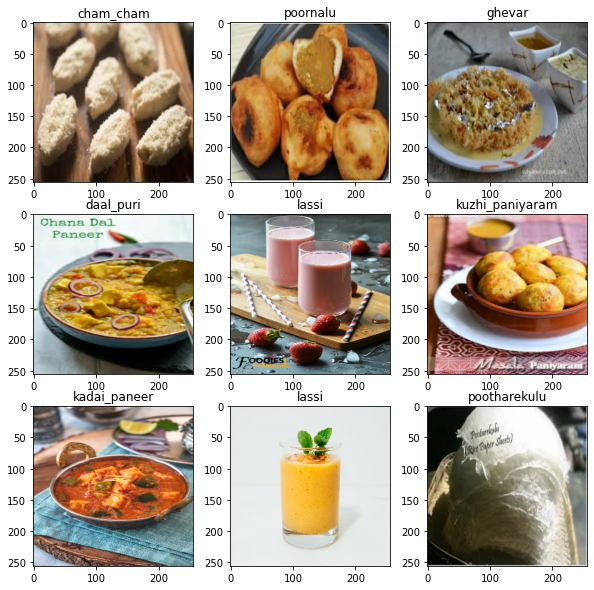

In [4]:
# images from indian Food dataset
plt.figure(figsize=(10, 10))
for imgs, labels in indianFoodImgs.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(imgs[i].numpy().astype("uint8"))
        plt.title(IndianFoodClasses[labels[i]])

## Loading Other Food Images

#### Getting training data labels from 

In [5]:
food_train_list = np.asarray(pd.read_csv('./4_project_data/train_img.csv'))

print(food_train_list)

[['f27632d7e5.jpg' 'water']
 ['efa87919ed.jpg' 'pizza-margherita-baked']
 ['4f169e8c8d.jpg' 'broccoli']
 ...
 ['8762d1cefd.jpg' 'carrot']
 ['28e7439245.jpg' 'broccoli']
 ['ba263cfb41.jpg' 'cucumber']]


### Preprocessing images.
making directories for each class and puting images in their respective classes directory

In [ ]:
# making directories for each class
for list in food_train_list:
    if (os.path.isdir(f'./4_project_data/train_imgs/{list[1]}') is not True):
        os.mkdir(f'./4_project_data/train_imgs/{list[1]}')

# iterating all files in './4_project_data/train_imgs' directory
for root, dirs, files in os.walk('./4_project_data/train_imgs'):
    for file in files: # iterating files
        src = f'./4_project_data/train_imgs/{file}' # source of the img
        for names in food_train_list: # iterating all files name and their classes
            if (file == names[0]): # if file name found in list
                dist = f'./4_project_data/train_imgs/{names[1]}/{file}' # distination for file (which is file's class directory)
                shutil.move(src, dist) # Moving file
                break

### Loading training and testing data into datsets

In [7]:
food_train = keras.preprocessing.image_dataset_from_directory('./4_project_data/train_imgs')

Found 9323 files belonging to 61 classes.


In [8]:
food_test = keras.preprocessing.image_dataset_from_directory('./4_project_data/test_imgs', labels = None)

Found 484 files belonging to 1 classes.


In [9]:
FoodClasses = food_train.class_names
print(FoodClasses)

['almonds', 'apple', 'avocado', 'banana', 'beer', 'biscuits', 'boisson-au-glucose-50g', 'bread-french-white-flour', 'bread-sourdough', 'bread-white', 'bread-whole-wheat', 'bread-wholemeal', 'broccoli', 'butter', 'carrot', 'cheese', 'chicken', 'chips-french-fries', 'coffee-with-caffeine', 'corn', 'croissant', 'cucumber', 'dark-chocolate', 'egg', 'espresso-with-caffeine', 'french-beans', 'gruyere', 'ham-raw', 'hard-cheese', 'honey', 'jam', 'leaf-spinach', 'mandarine', 'mayonnaise', 'mixed-nuts', 'mixed-salad-chopped-without-sauce', 'mixed-vegetables', 'onion', 'parmesan', 'pasta-spaghetti', 'pickle', 'pizza-margherita-baked', 'potatoes-steamed', 'rice', 'salad-leaf-salad-green', 'salami', 'salmon', 'sauce-savoury', 'soft-cheese', 'strawberries', 'sweet-pepper', 'tea', 'tea-green', 'tomato', 'tomato-sauce', 'water', 'water-mineral', 'white-coffee-with-caffeine', 'wine-red', 'wine-white', 'zucchini']


# Merging datasets into one datset

In [13]:
train_ds = food_train.concatenate(indianFoodImgs)

<ConcatenateDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


## Adding Indian Food Classes in end to Food class

In [22]:
for i in IndianFoodClasses:
    FoodClasses.append(i)
    
print(len(FoodClasses))

223


In [23]:
batch_size = 32
input_shape = 256
totalClassesCount = len(FoodClasses)

In [27]:
model = keras.Sequential([
    keras.layers.InputLayer(input_shape=(input_shape, input_shape, 3), batch_size = batch_size),
    
    keras.layers.Rescaling(1./255, input_shape),
    keras.layers.RandomFlip(),
    keras.layers.RandomRotation((0.2, 0.2)),
    
    keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    keras.layers.MaxPool2D(),
    
    keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    keras.layers.MaxPool2D(),
    
    keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    keras.layers.MaxPool2D(),
    
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(totalClassesCount, activation='softmax')
    
])

In [29]:
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (32, 256, 256, 3)         0         
                                                                 
 random_flip_2 (RandomFlip)  (32, 256, 256, 3)         0         
                                                                 
 random_rotation_1 (RandomRo  (32, 256, 256, 3)        0         
 tation)                                                         
                                                                 
 conv2d_3 (Conv2D)           (32, 256, 256, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (32, 128, 128, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (32, 128, 128, 64)        1